# FBI Gun Data

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.
The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.

## Data reading and check

In [32]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

gun_data = pd.read_csv('gun_data.csv')
US_Census_Data = pd.read_csv('US_Census_Data.csv')

In [33]:
#check the data reading
gun_data.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


In [34]:
#summerize parts of data
gun_data['rentals_other'] = 0#fill up broken column
def sum_over_guns(gun_dataframe,column_index):
    '''
    Input:
        gun_dataframe: a pd.Dataframe contains 'xx_handgun', 'xx_long_gun', and 'xx_other' columns.
        column_index: the repeat common index "xx".
    Behavior:
        create new serie to by sum over 'xx_handgun', 'xx_long_gun', and 'xx_other' columns.
    Output:
        sum_over_guns: sum over data in 'xx_handgun', 'xx_long_gun', and 'xx_other'.
    '''
    handgun = column_index + '_handgun'
    long_gun = column_index + '_long_gun'
    other = column_index + '_other'
    sum_over_guns = gun_dataframe[handgun] + gun_dataframe[long_gun] + gun_dataframe[other]
    return sum_over_guns

gun_data_summerize = gun_data.fillna(0)
gun_data_summerize['prepawn'] = sum_over_guns(gun_data_summerize,'prepawn')
gun_data_summerize['redemption'] = sum_over_guns(gun_data_summerize,'redemption')
gun_data_summerize['returned'] = sum_over_guns(gun_data_summerize,'returned')
gun_data_summerize['rentals'] = sum_over_guns(gun_data_summerize,'rentals')
gun_data_summerize['private_sale'] = sum_over_guns(gun_data_summerize,'private_sale')
gun_data_summerize['return_to_seller'] = sum_over_guns(gun_data_summerize,'return_to_seller')

gun_data_summerize = gun_data_summerize.fillna(0)
gun_data_summerize.head(2)#check data columns

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,return_to_seller_long_gun,return_to_seller_other,totals,rentals_other,prepawn,redemption,returned,rentals,private_sale,return_to_seller
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,3.0,32019,0,38.0,2641.0,0.0,0.0,28.0,3.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,6303,0,7.0,356.0,58.0,0.0,42.0,0.0


In [35]:
#check the data scale.
gun_data_summerize.shape

(12485, 34)

In [36]:
#check the data scale.
US_Census_Data.shape

(85, 52)

In [37]:
US_Census_Data = US_Census_Data.fillna(0)
US_Census_Data.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",0,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",0,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


## Refine and  grouping
To start analysis, we need to refine data. To analysis the following total items.
<ul>
    <li>prepawn and redemption</li>
    <li>returned and rentals</li>
    <li>private_sale and return_to_seller</li>
</ul>
By sum over corresponding handgun, long_gun, and other column.

In [38]:
#By state grouping data.
state_vs_gun = gun_data_summerize.groupby(['state'], as_index = False).sum()
state_vs_gun.head(2)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,return_to_seller_long_gun,return_to_seller_other,totals,rentals_other,prepawn,redemption,returned,rentals,private_sale,return_to_seller
0,Alabama,1047441.0,749.0,2222037.0,2626029.0,39578.0,105230,32.0,4239.0,6343.0,...,12.0,6.0,6706079,0,10608.0,653892.0,0.0,1.0,450.0,32.0
1,Alaska,13352.0,22.0,434602.0,572174.0,15970.0,28904,19.0,1043.0,1463.0,...,6.0,1.0,1137643,0,2507.0,68682.0,950.0,0.0,451.0,10.0


We find there are no rentals_other column. We add it for convenient. 

In [39]:
state_vs_gun.columns

Index(['state', 'permit', 'permit_recheck', 'handgun', 'long_gun', 'other',
       'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'rentals_other', 'prepawn',
       'redemption', 'returned', 'rentals', 'private_sale',
       'return_to_seller'],
      dtype='object')

## Which states have had the highest growth in gun registrations?
Check the distribution of gun v.s state. We may find which state got most of guns.

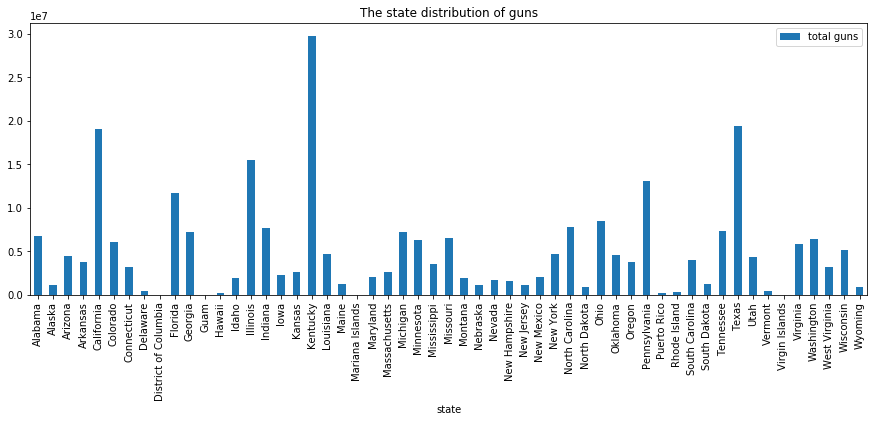

In [61]:
#Plot state v.s. number of total guns.
key_index = ['state', 'totals']
state_vs_gun_total = state_vs_gun.loc[:,key_index]
state_vs_gun_total.columns = ['state', 'total guns']
figure_1_title = 'The state distribution of guns'
state_vs_gun_total.plot(x='state', kind='bar', figsize=(15,5), title = figure_1_title)

To simplify the data, we select top 5 states to analysis. First, we check number of guns by time variation.

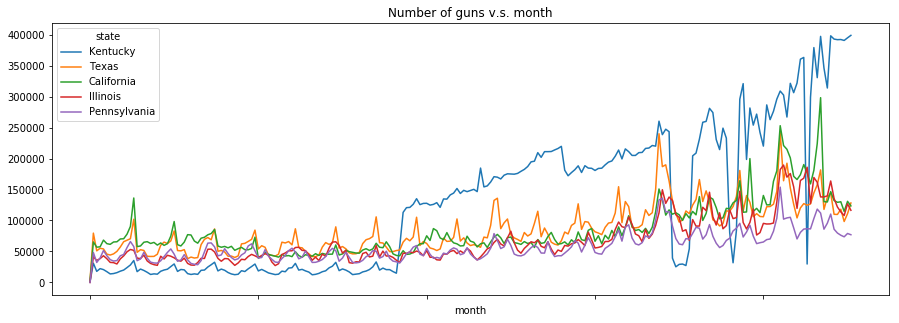

In [63]:
#select top 5 state.
totals_sort = state_vs_gun.sort_values('totals',ascending=False)
top_5_totals_gun_state = totals_sort.iloc[0:5,0]
#plot top 5 state month vs total guns.
gun_data_month_state = gun_data.groupby(['month','state'], as_index = False)
time_vs_totals_gun = gun_data_month_state.sum()
time_vs_totals_gun_reshape = time_vs_totals_gun.pivot(index='month', columns='state', values='totals')
figure_2_title = 'Number of guns v.s. month'
time_vs_totals_gun_reshape.loc[:,top_5_totals_gun_state].plot(kind='line', figsize=(15,5), title = figure_2_title)

It is abnormal trend up to Kentucky. To check what distribution of Kentucky.

In [614]:
gun_data_summerize.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals', 'rentals_other', 'prepawn',
       'redemption', 'returned', 'rentals', 'private_sale',
       'return_to_seller'],
      dtype='object')

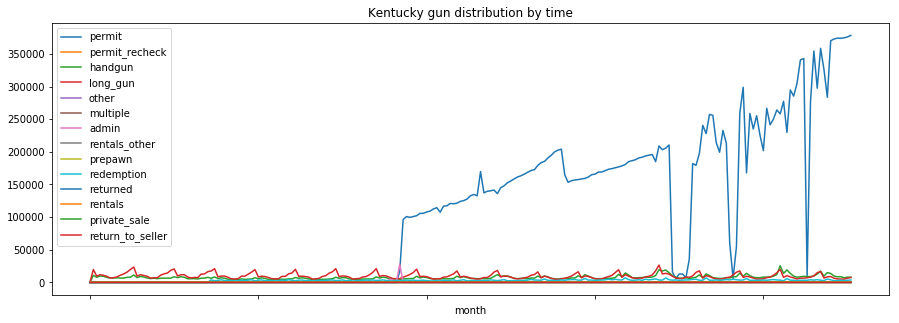

In [64]:
#dorp unnecessary columns.
drop_columns = ['prepawn_handgun', 'prepawn_long_gun', 'prepawn_other', 'redemption_handgun', 
                'redemption_long_gun','redemption_other', 'returned_handgun', 'returned_long_gun',
                'returned_other', 'rentals_handgun', 'rentals_long_gun','private_sale_handgun', 
                'private_sale_long_gun', 'private_sale_other','return_to_seller_handgun', 
                'return_to_seller_long_gun','return_to_seller_other','totals']
gun_data_drop = gun_data_summerize.drop(drop_columns, axis=1)
gun_data_drop_by_month = gun_data_drop.sort_values(by='month')
figure_3_title = 'Kentucky gun distribution by time'
gun_data_drop_by_month.loc[gun_data['state'] == 'Kentucky'].plot(kind='line', x='month', figsize=(15,5), title=figure_3_title)

**The trend chart shows that "permit" almost dominates the number of guns in Kentucky, i.e. the highest registration rate.** 

## What is the overall trend of gun purchases?
To check this part, we remove 'permit','permit_recheck' first.

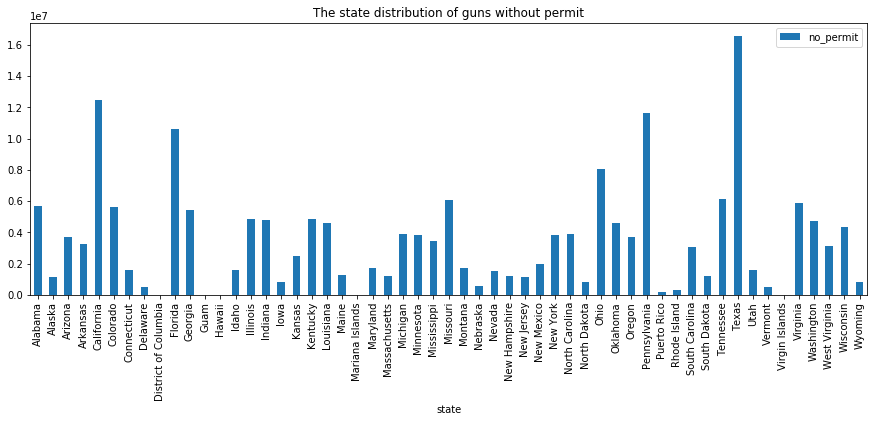

In [66]:
#Find the most dominate state without "permit" noise.
#(note: total - permit - permit_recheck). 
state_vs_gun['no_permit'] = state_vs_gun['totals'] - state_vs_gun['permit'] - state_vs_gun['permit_recheck']
no_permit_index = ['state', 'no_permit']
state_vs_gun_no_permit= state_vs_gun.loc[:,no_permit_index]
figure_4_title = 'The state distribution of guns without permit'
state_vs_gun_no_permit.plot(x='state',kind='bar', figsize=(15,5), title=figure_4_title)

It shows that Texas is the newest champion. We check the gun distribution of Texas since it dominate the overall data.

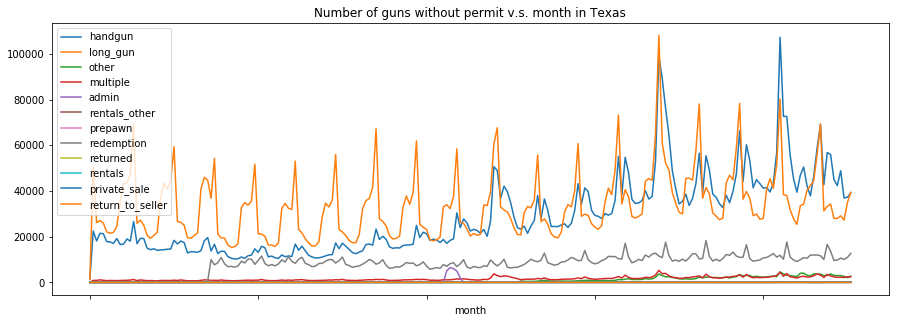

In [440]:
#The detail gun distribution of Texas by time.
gun_data_drop_by_month_no_permit = gun_data_drop_by_month.drop(['permit','permit_recheck'], axis=1)
figure_5_title = 'Number of guns without permit v.s. month in Texas'
gun_data_drop_by_month_no_permit.loc[gun_data['state'] == 'Texas'].plot(kind='line', x='month', figsize=(15,5), title=figure_5_title)

This Texas trend chart shows that **the gun purchases of guns trend up periodically**. 
## What is the period of number of guns increase in Texas?
Since the number of handgun and long gun dominate the trend chart. We may as what period of the time. To check it, we isolate the handgun and long gun column.

In [72]:
#Extract Texas handgun and long_gun data
gun_dominate_columns = ['month','handgun','long_gun']
Time_vs_Texas_gun = gun_data_drop_by_month_no_permit.loc[gun_data['state'] == 'Texas',gun_dominate_columns]
Time_vs_Texas_gun.head(3)

,month,handgun,long_gun
12476,1998-11,1384.0,1349.0
12421,1998-12,22478.0,50899.0
12366,1999-01,18123.0,26179.0


Since month column is string, it hard to calculate. We need to label a new index.

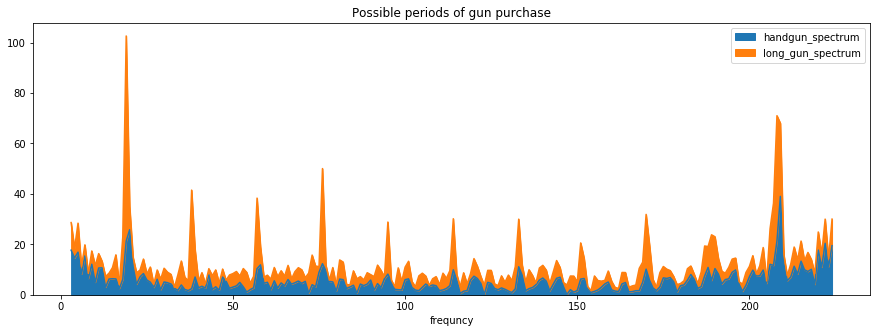

In [77]:
#Sperate to numpy array
order = 10**5
handgun_and_time = np.array(Time_vs_Texas_gun['handgun'])/order
long_gun_and_time = np.array(Time_vs_Texas_gun['long_gun'])/order
#Do FFT find max month frequency.
handgun_frqency = np.fft.fft(np.exp(2j * np.pi * handgun_and_time))
long_gun_frqency = np.fft.fft(np.exp(2j * np.pi * long_gun_and_time))
#Adding absolute values column.
gun_frqency = pd.DataFrame()
gun_frqency['handgun_spectrum'] = np.absolute(handgun_frqency)
gun_frqency['long_gun_spectrum'] = np.absolute(long_gun_frqency)
N = len(gun_frqency)
trivial_frequency_region = 3
gun_frqency['frequncy'] = np.arange(N)
gun_frqency_refine = gun_frqency.loc[trivial_frequency_region:N-trivial_frequency_region]
#Plot data
figure_5_title = 'Possible periods of gun purchase'
gun_frqency_refine.plot(kind='area', x='frequncy', figsize=(15,5), title=figure_5_title)

We find that both handgun and long_gun have two peaks.

In [78]:
#Check the main frequecies of the handgun data.
gun_frqency_refine.sort_values('handgun_spectrum', ascending = False).head(3)

,handgun_spectrum,long_gun_spectrum,frequncy
209,39.007352,28.975316,209
20,25.798635,9.300694,20
19,21.311382,81.310095,19


The max frequncy of handgun is 209. It just indicate the number of handgun trend up during this 227 month gun data of Texas. The second frequncy is about 20. It indicate the number of handgun reaches local maxium about 20 month.

In [79]:
#Check the main frequecies of the long gun data.
gun_frqency_refine.sort_values('long_gun_spectrum', ascending = False).head(3)

,handgun_spectrum,long_gun_spectrum,frequncy
19,21.311382,81.310095,19
208,21.298534,49.707765,208
38,2.424076,39.084774,38


So as long gun data, the frequecy 208 just reflect the number of long gun trend up during this statistical period. However, we may notice that the frequecy 19 reaches the max pick. It means the local deviation is more higher than long term trend up. Generally speaking, **19 month is the period, which reflects the number of guns rise and decrease**.
(p.s this is the only way I thought to using numpy in this project. :) )

## The relations between Census
We want to know the correlation between U.S. census and number of no permit guns. First, we need to elaborate the data to better visualization.

In [399]:
def convert_number(data_input):
    """
    Input:
        data_input: a string data. e.g. %, $,...
    Behavior:
        Convert the strings in US Census to float.
        Ex: 50% => 0.5, $60,333 => 60333
    Output:
        data_output: a float which convert by string.
    """
    if data_input in ['-','D','F','FN','NA','S','X','Z']:
        data_output = 0
    elif '%' in data_input:
        data_output = float(data_input[0:-2])/100
    elif '$' or ',' in data_input:
        data_output = ''
        for char in data_input:
            if (char != '$') and (char !=','):
                data_output += char
        data_output = float(data_output)
    return data_output

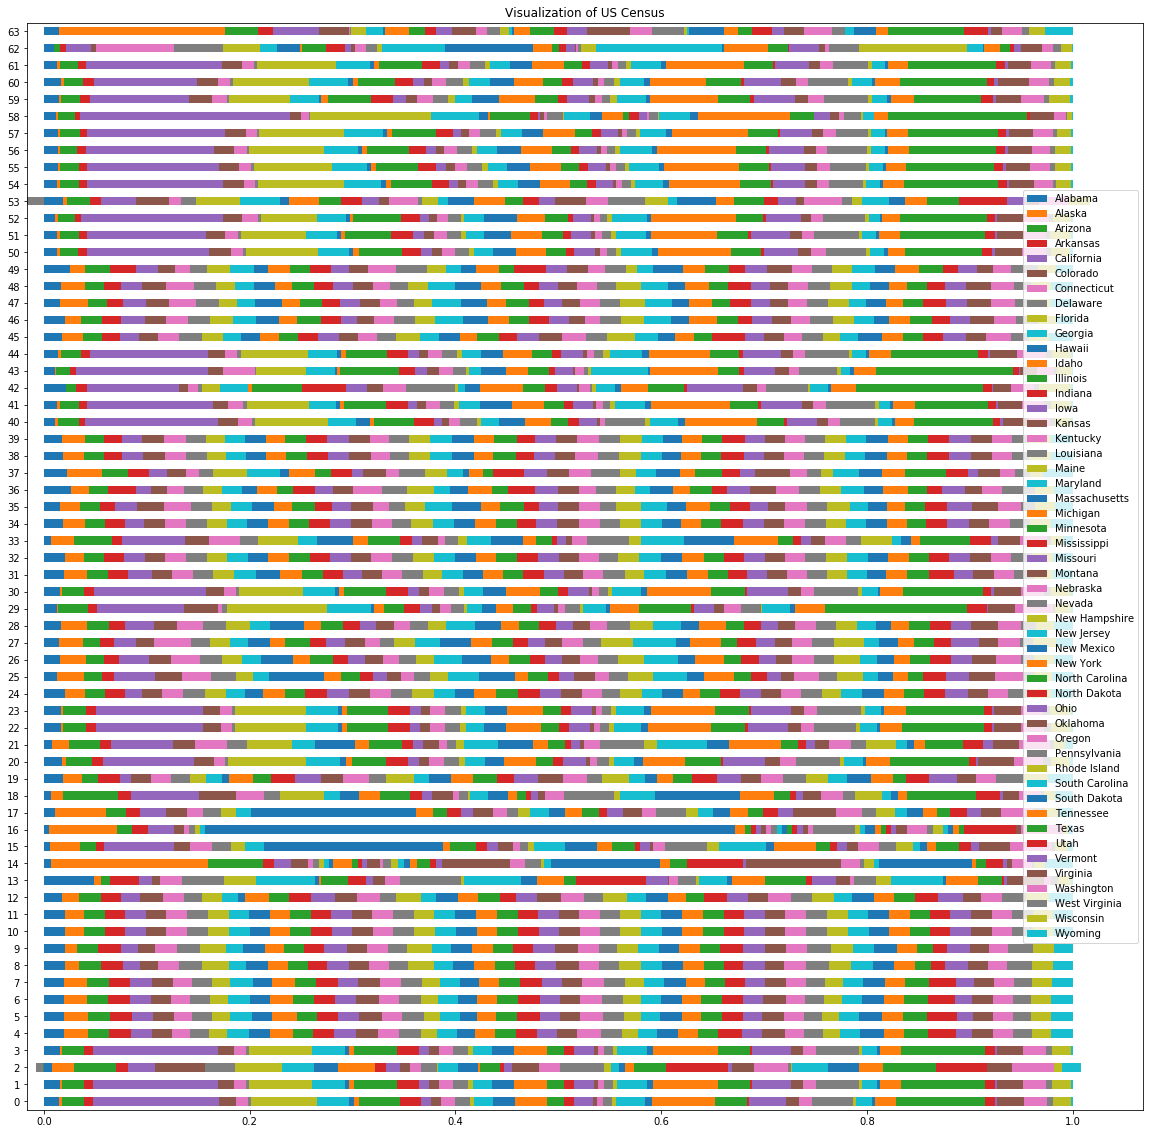

In [445]:
#Drop redundant parts
US_Census_Data.drop(columns='Fact Note')
USC_Data_drop = US_Census_Data.drop(US_Census_Data.index[64:])
#Split to classification part and raw data part
US_Census_row_info = USC_Data_initial.iloc[:,0:2]
USC_data_raw = USC_Data_drop.iloc[:,2:]
#Convert raw data
USC_data = USC_data_raw.applymap(convert_number)
USC_data['total'] = USC_data.sum(axis = 1)
USC_data_norm = USC_data.div(USC_data.total,axis = 0)
#Visualize
USCensus = pd.concat([US_Census_row_info, USC_data_norm.drop(columns='total')], axis=1)
figure_6_title = 'Visualization of US Census'
USCensus.plot(kind='barh',stacked=True, figsize=(20,20), title = figure_6_title)